OVERVIEW

This analysis explores movie data in order to understand factors that contribute to a movie's success both in revenue and ratings

PROBLEM STATEMENT

This study seeks to analyse and understand factors that comytibute to a movies success.

OBJECTIVES

1. Highlight genres with the highest ratings
2. Show genres that generate the highest revenue
3. To show the relationship between budget and revenue
4. Highlight genres with the highest return on investments

In [223]:


import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns





In [224]:
import sqlite3
conn = sqlite3.connect(r"C:\Users\Peter Mutethia\Desktop\Movie-Insights\data\im.db")
#connects to the database
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

print(cursor.fetchall())
#returns names of all the tables










[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [225]:
movie_basics = pd.read_sql("""
                SELECT *
                FROM movie_basics;
                """, conn)
#reads the movie_basics table from the database
movie_basics.head()
# shows the first five rows of every column from the movie_basics table


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [226]:
movie_ratings = pd.read_sql("""
                SELECT *
                FROM movie_ratings;
                """, conn)
#reads the movie_ratings table from the database
movie_ratings.head()
# shows the first five rows of every column from the movie_ratings table


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [227]:
movies = pd.merge(movie_basics, movie_ratings, on= "movie_id")
# merges the movie_basics and movie_ratings tables on movie_id which is common in both

In [228]:
movies.head()
#shows the first five rows of every column 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


DATA CLEANING

In [229]:
duplicates = movies.columns[movies.columns.duplicated()]
duplicates
# checks for duplicate columns

Index([], dtype='object')

In [230]:
movies.isnull().sum()
#shows number of missing values in every column

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [231]:
movies['genres'] = movies['genres'].fillna('unknown')
#fills the missing values in the genres column with unknown.
movies = movies.drop(columns=["runtime_minutes"])
#drops the runtime_minutes column

In [232]:
movies.isnull().sum()
#shows number of missing values in every column

movie_id          0
primary_title     0
original_title    0
start_year        0
genres            0
averagerating     0
numvotes          0
dtype: int64

In [233]:
movies.head()
#shows the first five rows of every column 

,movie_id,primary_title,original_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5,119


In [234]:
bom = pd.read_csv(r"C:\Users\Peter Mutethia\Desktop\Movie-Insights\data\bom.movie_gross.csv")
#reads the bom.movie_gross csv file

In [235]:
bom.head()
#shows the first five rows of every column


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [236]:
bom.isnull().sum()
#shows number of missing values in every column

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [237]:
bom["domestic_gross"] = pd.to_numeric(bom["domestic_gross"],errors="coerce")
bom["foreign_gross"] = pd.to_numeric(bom["foreign_gross"],errors="coerce")
# changes all entries in domestic_gross and foreign_gross columns to numeric





In [238]:
bom.isnull().sum()
#shows number of missing values in every column


title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

In [239]:
bom = bom.dropna(subset=["domestic_gross","foreign_gross"])
# drops all missing rows in domestic_gross and foreign_gross columns
bom["studio"] = bom["studio"].fillna("unknown")
# fills all missing rows in studio column with unknown

In [240]:
bom.isnull().sum()
#shows number of missing values in every column


title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [241]:
bom.shape
# shows total number of rows and columns respectively

(2004, 5)

I opted against using this dataset and proceeded with the movie budgets data set

In [242]:
tn = pd.read_csv(r"C:\Users\Peter Mutethia\Desktop\Movie-Insights\data\tn.movie_budgets.csv")
# reads the tn.movie_budgets.csv

In [243]:
tn.head() 
#shows the first five rows of every column 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [244]:
tn['release_year'] = pd.to_datetime(tn['release_date'], errors='coerce').dt.year
# changes all entries in release_year column to date time format



In [245]:
tn.isnull().sum()
#shows number of missing values in every column


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_year         0
dtype: int64

In [246]:
tn.shape
# shows total number of rows and columns respectively

(5782, 7)

In [247]:
tmdb = pd.read_csv(r"C:\Users\Peter Mutethia\Desktop\Movie-Insights\data\tmdb.movies.csv")
#reads tmdb.movies.csv

In [248]:
tmdb.head()
#shows the first five rows of every column 


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [249]:
tmdb.shape
# shows total number of rows and columns respectively

(26517, 10)

In [250]:
tmdb.isnull().sum()
#shows number of missing values in every column

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

MERGING THE DATASETS BASED ON WHAT THEY HAVE IN COMMON

In [251]:
movies['primary_title'] = movies['primary_title'].str.strip().str.lower()
tn['movie'] = tn['movie'].str.strip().str.lower()
tmdb['title'] = tmdb['title'].str.strip().str.lower()
# converts primary_title, movie, title to lowercase.



In [252]:
merged = pd.merge(movies, tn, left_on='primary_title', right_on='movie', how='inner')
#merges movies data set with the tn budgets dataset
merged_movies = pd.merge(merged, tmdb, left_on='primary_title', right_on='title', how='inner')
#merges the merged data set with the tmdb data set

In [253]:
merged_movies.head()
#shows the first five rows of every column 

,movie_id,primary_title,original_title_x,start_year,genres,averagerating,numvotes,id_x,release_date_x,movie,...,Unnamed: 0,genre_ids,id_y,original_language,original_title_y,popularity,release_date_y,title,vote_average,vote_count
0,tt0249516,foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",foodfight!,...,8456,"[16, 28, 35, 10751]",116977,en,Foodfight!,4.705,2013-05-07,foodfight!,2.1,46
1,tt0326592,the overnight,The Overnight,2010,unknown,7.5,24,21,"Jun 19, 2015",the overnight,...,14596,"[9648, 35]",308024,en,The Overnight,6.576,2015-06-19,the overnight,6.0,200
2,tt3844362,the overnight,The Overnight,2015,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015",the overnight,...,14596,"[9648, 35]",308024,en,The Overnight,6.576,2015-06-19,the overnight,6.0,200
3,tt0337692,on the road,On the Road,2012,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",on the road,...,5350,"[12, 18]",83770,en,On the Road,8.919,2012-12-21,on the road,5.6,518
4,tt4339118,on the road,On the Road,2014,Drama,6.0,6,17,"Mar 22, 2013",on the road,...,5350,"[12, 18]",83770,en,On the Road,8.919,2012-12-21,on the road,5.6,518


In [254]:
merged_movies.shape
# shows total number of rows and columns respectively

(3457, 24)

In [255]:
merged_movies.isnull().sum()
#shows number of missing values in every column

movie_id             0
primary_title        0
original_title_x     0
start_year           0
genres               0
averagerating        0
numvotes             0
id_x                 0
release_date_x       0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_year         0
Unnamed: 0           0
genre_ids            0
id_y                 0
original_language    0
original_title_y     0
popularity           0
release_date_y       0
title                0
vote_average         0
vote_count           0
dtype: int64

In [256]:
merged_movies = merged_movies[['movie', 'averagerating', 'production_budget', 'worldwide_gross','genres','vote_count']]
# selecting only the relevant columns 

In [257]:
merged_movies.head()
#shows the first five rows of every column 

,movie,averagerating,production_budget,worldwide_gross,genres,vote_count
0,foodfight!,1.9,"$45,000,000","$73,706","Action,Animation,Comedy",46
1,the overnight,7.5,"$200,000","$1,165,996",unknown,200
2,the overnight,6.1,"$200,000","$1,165,996","Comedy,Mystery",200
3,on the road,6.1,"$25,000,000","$9,313,302","Adventure,Drama,Romance",518
4,on the road,6.0,"$25,000,000","$9,313,302",Drama,518


In [258]:
merged_movies.shape
# shows total number of rows and columns respectively

(3457, 6)

In [259]:
merged_movies['production_budget'] = (merged_movies['production_budget'].astype(str).str.replace('[^0-9.]', '', regex=True))               
merged_movies['worldwide_gross'] = (merged_movies['worldwide_gross'].astype(str).str.replace('[^0-9.]', '', regex=True))
#converts all entries in the production_budget and worlwide gross to numeric having only didgits and decimal points                                 

In [260]:
merged_movies["production_budget"] = pd.to_numeric(merged_movies["production_budget"],errors="coerce")
merged_movies["worldwide_gross"] = pd.to_numeric(merged_movies["worldwide_gross"],errors="coerce")
merged_movies["vote_count"] = pd.to_numeric(merged_movies["vote_count"],errors="coerce")
#forces all entries in the production_budget, vote_count and worlwide gross to numeric

In [261]:
merged_movies['roi'] = (merged_movies['worldwide_gross'] - merged_movies['production_budget']) / merged_movies['production_budget']
#calculates return on ivestment

In [262]:
merged_movies['roi'] = merged_movies['roi'].round(2)
#rounds roi to 2 decimal places

In [263]:
merged_movies.head()
#shows the first five rows of every column 

,movie,averagerating,production_budget,worldwide_gross,genres,vote_count,roi
0,foodfight!,1.9,45000000,73706,"Action,Animation,Comedy",46,-1.00
1,the overnight,7.5,200000,1165996,unknown,200,4.83
2,the overnight,6.1,200000,1165996,"Comedy,Mystery",200,4.83
3,on the road,6.1,25000000,9313302,"Adventure,Drama,Romance",518,-0.63
4,on the road,6.0,25000000,9313302,Drama,518,-0.63


In [264]:
merged_movies.info()
#gives information on the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3457 entries, 0 to 3456
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              3457 non-null   object 
 1   averagerating      3457 non-null   float64
 2   production_budget  3457 non-null   int64  
 3   worldwide_gross    3457 non-null   int64  
 4   genres             3457 non-null   object 
 5   vote_count         3457 non-null   int64  
 6   roi                3457 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 216.1+ KB


In [265]:
merged_movies.describe()
#shows summary statistics

,averagerating,production_budget,worldwide_gross,vote_count,roi
count,3457.000000,3.457000e+03,3.457000e+03,3457.00000,3457.000000
mean,6.292826,3.532523e+07,1.094507e+08,1369.28869,4.595143
std,1.181180,4.904120e+07,2.072428e+08,2464.48634,16.746960
min,1.600000,9.000000e+03,0.000000e+00,1.00000,-1.000000
25%,5.700000,5.000000e+06,2.455027e+06,11.00000,-0.690000
50%,6.400000,1.500000e+07,3.658851e+07,306.00000,0.700000
75%,7.100000,4.000000e+07,1.017595e+08,1676.00000,2.910000
max,9.300000,4.250000e+08,2.776345e+09,22186.00000,415.560000


DATA ANALYSIS

CORRELATION MATRIX

Shows how the variables are correlated by computing a correlation coefficient.

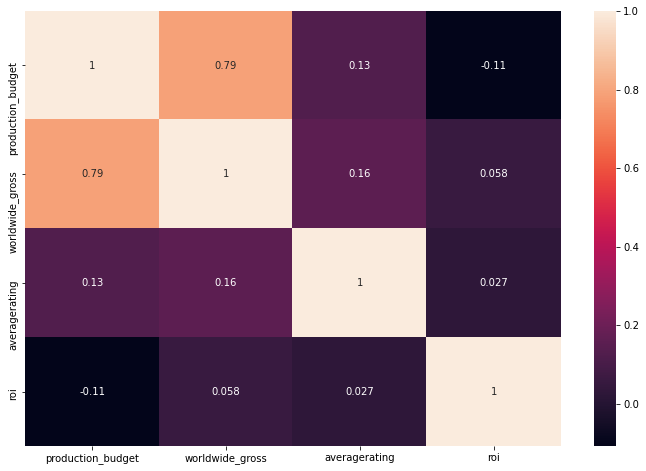

In [266]:
plt.figure(figsize=(12, 8))
sns.heatmap(merged_movies[['production_budget','worldwide_gross','averagerating','genres','roi']].corr(), annot=True)
plt.show()
#computes the correlation matrix

Production budget is highly positively correlated with world wide gross with a correlation coefficient of  0.79. This shows that movies with a high production budget tend to generate more revenue.

world wide gross and average rating have a low correlation coefficient of 0.16 showing a very weak positive relationship they are not strongly related

production budget and average rating have a low correlation coefficient of 0.13 showing a very weak positive relationship they are not strongly 
related

World wide gross and return on investment column roi have a correlation coefficient 0.058 showing a very weak positive correlation.A high world wide gross doesn't necessarily guarantee a good return on investment

average rating and return on investment column roi have a correlation coefficient 0.027 showing a very weak positive correlation.A high average rating doesn't necessarily guarantee a good return on investment


HOW DIFFERENT GENRES COMPARE BASED ON MOVIE RATINGS

In [267]:
merged_movies['genres'] = merged_movies['genres'].str.split(',')
#splits each string into a list using the comma , as the separator for movies with more than one genre.
merged_movies_exploded = merged_movies.explode('genres')
#creates a new row for each entry in the list
merged_movies_exploded['genres'] = merged_movies_exploded['genres'].str.strip()
#removes spaces

In [268]:
genre_gross = merged_movies_exploded.groupby('genres')['worldwide_gross'].mean().reset_index()
#average worldwide gross for each genre.

In [269]:
genre_gross = genre_gross.sort_values('worldwide_gross', ascending=False)
#sorts in descending order

In [270]:
top10 = genre_gross.nlargest(10, 'worldwide_gross')
#takes the top 10 highest grossing genres

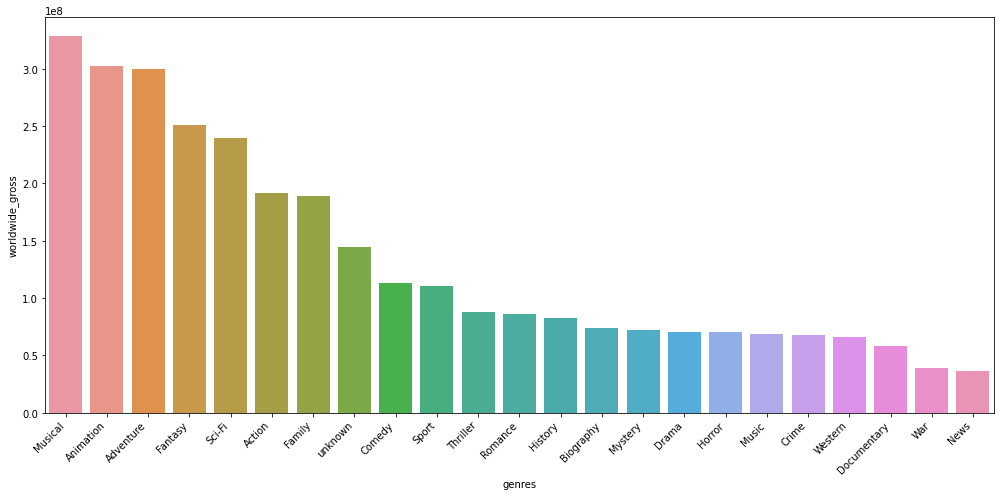

In [271]:
plt.figure(figsize=(14, 7)) 

sns.barplot(data=genre_gross, x='genres', y='worldwide_gross')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#plots a bar graph

Movies with genres; Musical animation adventure fantasy and sci-fi are the highest grossing worlwide

HOW DIFFERENT GENRES COMPARE BASED ON RETURN ON INVESTMENTS


In [272]:
genre_gross = merged_movies_exploded.groupby('genres')['roi'].mean().reset_index()
#average roi for each genre

In [273]:
genre_gross = genre_gross.sort_values('roi', ascending=False)
#sorts in descending order

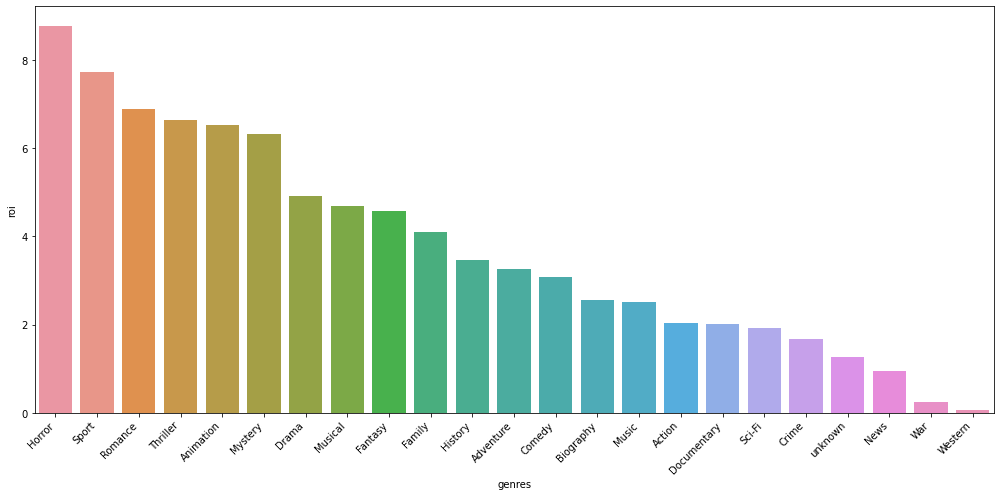

In [274]:
plt.figure(figsize=(14, 7)) 

sns.barplot(data=genre_gross, x='genres', y='roi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#plots a bar graph

Horror, sport, romance, thriller and animation movies are the top 5 in return on investments

GENRES WITH THE HIGHEST RATINGS

In [275]:
genre_ratings = merged_movies_exploded.groupby('genres')['averagerating'].mean().reset_index()
#takes average rating of each genre

In [276]:
top15 = genre_ratings.sort_values('averagerating', ascending=False).head(15)
#top 15 genres by ratings

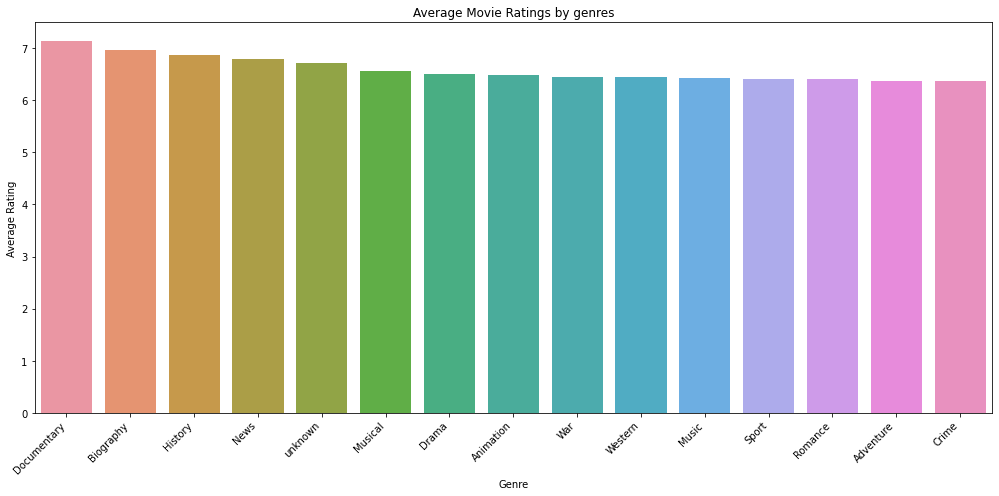

In [277]:
plt.figure(figsize=(14, 7))  
sns.barplot(data=top15, x='genres', y='averagerating')

plt.title('Average Movie Ratings by genres')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# plots a bar graph

Movies with genres; documentary, biography, history, news and musical have the best ratings.

CONCLUSIONS

Movies with a higher budget tend to gross higher world wide perhaps due to better quality and marketing but that doesn't guarantee a good return on investments.

Movies with genres; Musical animation adventure fantasy and sci-fi are the highest grossing worlwide

Movies with genres; documentary, biography, history, news and musical have the best ratings.

A movie may have high ratings but generate little revenue



RECCOMMENDATIONS

It would be best to make a movie with multiple genres.  A Movie with genres mystery,animation and adventure would get the company the best of both worlds. 
Genres animation and adventure both rank high in world wide gross, ratings and return on investments. Mystery ranks high in return on investments
This would give the company a good blend of the best of both worlds.
